## Project Student Intervention System - Dataset Exploration
#### by Samuel Jiménez Sanabria


## Dataset choice motivation
> During my research to study Machine Learning at Udacity I discovered a capstone project called "Building a Student Intervention System". I was instantly captured by this project as it lies very close to my daily job as an Educational IT Strategist and Analyst. 
Upon contacting Udacity I discovered that the project wasn't part of the program anymore but the the code and projects from the students were available on GitHub for everyone to study. I immediately started to study the notebooks and eventualy started to develop my own models. The focus of the Student Intervention System capstone projects is the development of the prediction models, not the visualizations. And even if some projects show maybe one or two charts, visualizations for this project have not been explored. That's the main reason I choose this dataset to work with visualizations.
> The dataset collects a number of features that can be related to the student success. The last column "passed", indicates if the student managed to pass the final exams or not.
This dataset is intended to be used to create prediction models but can also be used to study social and pedagogical conditions where the learning process has been taking place. The dataset includes observations for a single school of 395 students, which is not a lot, but probably enough to get some insights.

## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#pre-wra)
- [Basic Exploration and Statistics](#explore)
- [Basic  Model Preparation](#model)
- [Correlation](#corr)
- [Exploration with StatsModels](#stats)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](mu)
- [Conclusions](#conclusions)
- [The Unanswered Question](#question)

### Introduction <a id='intro'></a>

> As education has grown to rely more and more on technology, more and more data is available for examination and prediction. Logs of student activities, grades, interactions with teachers and fellow students, and more are now captured through learning management systems like Canvas and Edmodo and available in real time. This is especially true for online classrooms, which are becoming more and more popular even at the middle and high school levels. Within all levels of education, there exists a push to help increase the likelihood of student success without watering down the education or engaging in behaviors that raise the likelihood of passing metrics without improving the actual underlying learning. Graduation rates are often the criteria of choice for this, and educators and administrators are after new ways to predict success and failure early enough to stage effective interventions, as well as to identify the effectiveness of different interventions.

> In this project I'll explore the features of a student results dataset trying to understand the general structure of the data and in which grade these features affect the students results.

## Preliminary Wrangling <a id='pre-wra'></a>


### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette("deep", desat=0.5)
sns.set_style("darkgrid")
base_color = sns.color_palette()[0]
import statsmodels.api as sm

%matplotlib inline

In [2]:
student_data = pd.read_csv('student-data.csv', sep=';') 

### The features of the dataset explained:

- student_id: random row identifier number
- sex: student's sex (binary: "F" - female or "M" - male)
- age: student's age (numeric: from 15 to 22)
- guardian: student's guardian (nominal: "mother", "father" or "other")
- father_edu: father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 secondary education or 4 – higher education)
- father_job: father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- mother_edu: mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 secondary education or 4 – higher education)
- mother_job: mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
- parents_status: parent's cohabitation status (binary: "T" - living together or "A" - apart)
- family_relations: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- family_support: family educational support (binary: yes or no [1 or 0])
- family_size: family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
- address: student's home address type (binary: "U" - urban or "R" - rural)
- reason: reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
- weekend_alcohol: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- workday_alcohol: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- extra_activities: extra-curricular activities (binary: yes or no [1 or 0])
- freetime: free time after school (numeric: from 1 - very low to 5 - very high)
- goes_out: going out with friends (numeric: from 1 - very low to 5 - very high)
- health: current health status (numeric: from 1 - very bad to 5 - very good)
- nursery: attended nursery school (binary: yes or no [1 or 0])
- wants_higher: wants to take higher education (binary: yes or no [1 or 0])
- internet: Internet access at home (binary: yes or no [1 or 0])
- in_relationship: with a romantic relationship (binary: yes or no [1 or 0])
- school: student's school (binary: "GP" or "MS")
- school_support: extra educational support (binary: yes or no [1 or 0])
- paid_class: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no [1 or 0])
- absences: number of school absences (numeric: from 0 to 93)
- failures: number of past class failures (numeric: n if 1<=n<3, else 4)
- traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4  >1 hour)
- studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- passed: did the student pass the final exam (binary: yes or no, [1 or 0] )


----------------------

* #### What is the structure of the dataset?

> To answer these question based on some data exploration I'll create a simple model to study the dataset before I dive in into the visualizations. 
> In the following section I'll do a few basic things to get a quick overview of the importance of the different features related to if a student passes or not their final exam:
    - Basic Exploration and Statistics.
    - Create a correlation matrix and visually explore correlation coefficients.
    - Create a basic model to measure the significance of some of those features.


### Basic Exploration and Statistics <a id='explore'></a>

In [3]:
# Overview and structure of the dataset
print('----------')
print(student_data.shape)
print('----------')
print(student_data.info())
student_data.head(8)

----------
(395, 32)
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
student_id          395 non-null int64
sex                 395 non-null object
age                 395 non-null int64
guardian            395 non-null object
father_edu          395 non-null int64
father_job          395 non-null object
mother_edu          395 non-null int64
mother_job          395 non-null object
parents_status      395 non-null object
family_relations    395 non-null int64
family_support      395 non-null int64
family_size         395 non-null object
address             395 non-null object
reason              395 non-null object
weekend_alcohol     395 non-null int64
workday_alcohol     395 non-null int64
extra_activities    395 non-null int64
freetime            395 non-null int64
goes_out            395 non-null int64
health              395 non-null int64
nursery             395 non-null int64
wants_higher        395 non-null int

,student_id,sex,age,guardian,father_edu,father_job,mother_edu,mother_job,parents_status,family_relations,...,internet,in_relationship,school,school_support,paid_class,absences,failures,traveltime,studytime,passed
0,815,M,15,mother,2,other,2,other,T,4,...,1,0,GP,0,1,2,0,1,1,1
1,907,M,16,mother,2,other,3,other,T,5,...,1,0,GP,0,1,0,0,1,1,1
2,644,F,15,father,3,other,2,other,T,3,...,0,0,GP,0,0,0,0,2,1,0
3,827,F,15,mother,3,other,3,other,A,5,...,1,0,GP,0,1,6,0,1,1,1
4,929,M,16,mother,1,other,3,other,T,5,...,0,0,GP,0,0,2,0,1,1,1
5,838,M,17,mother,1,other,2,other,T,4,...,1,0,GP,1,0,2,3,2,1,1
6,880,M,15,father,3,services,2,other,T,3,...,1,1,GP,1,1,2,0,1,1,1
7,559,F,16,mother,4,other,4,other,T,5,...,1,0,GP,0,0,6,0,1,1,1


In [4]:
student_data.describe()

,student_id,age,father_edu,mother_edu,family_relations,family_support,weekend_alcohol,workday_alcohol,extra_activities,freetime,...,wants_higher,internet,in_relationship,school_support,paid_class,absences,failures,traveltime,studytime,passed
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,748.936709,16.696203,2.521519,2.749367,3.944304,0.612658,2.291139,1.481013,0.508861,3.235443,...,0.949367,0.832911,0.334177,0.129114,0.458228,5.708861,0.334177,1.448101,2.035443,0.670886
std,141.587477,1.276043,1.088201,1.094735,0.896659,0.487761,1.287897,0.890741,0.500555,0.998862,...,0.219525,0.373528,0.472300,0.335751,0.498884,8.003096,0.743651,0.697505,0.839240,0.470487
min,500.000000,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,631.000000,16.000000,2.000000,2.000000,4.000000,0.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,745.000000,17.000000,2.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,2.000000,1.000000
75%,861.000000,18.000000,3.000000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,8.000000,0.000000,2.000000,2.000000,1.000000
max,997.000000,22.000000,4.000000,4.000000,5.000000,1.000000,5.000000,5.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,4.000000,4.000000,1.000000


#### Overview of features and values
Here I'll list all the features of the dataset and the values present for each feature. I'll exclude the column 'student_id' as it doesn't provide any useful information.

In [5]:
# Create a dataset without the "student_id" column
values_df = student_data.iloc[:, 1:]

In [6]:
# Create a loop to print all values for the columns (except "student_id")
for c in values_df.columns:
    print (values_df[c].value_counts())

F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
mother    273
father     90
other      32
Name: guardian, dtype: int64
2    115
3    100
4     96
1     82
0      2
Name: father_edu, dtype: int64
other       217
services    111
teacher      29
at_home      20
health       18
Name: father_job, dtype: int64
4    131
2    103
3     99
1     59
0      3
Name: mother_edu, dtype: int64
other       141
services    103
at_home      59
teacher      58
health       34
Name: mother_job, dtype: int64
T    354
A     41
Name: parents_status, dtype: int64
4    195
5    106
3     68
2     18
1      8
Name: family_relations, dtype: int64
1    242
0    153
Name: family_support, dtype: int64
GT3    281
LE3    114
Name: family_size, dtype: int64
U    307
R     88
Name: address, dtype: int64
course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
1    151
2     85
3   

----------------------

#### Some quick statistics on the dataset

In [7]:
n_students = student_data.shape[0]
n_features = student_data.shape[1] 
n_passed =  student_data.query("passed == 1").shape[0]
n_failed =  student_data.query("passed == 0").shape[0]
grad_rate = (n_passed*1.0) / (n_students*1.0) * 100
print ("Total number of students: {}".format(n_students))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Number of features: {}".format(n_features))
print ("Graduation rate of the class: {:.2f}%".format(float(grad_rate)))

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Number of features: 32
Graduation rate of the class: 67.09%


#### Comment on statistics above 
The Graduation rate is very low. 67% of success means that only about 20 students pass in a class of 30. Or what it the same, 1/3 of the students of the school fail to pass the final exams.

In [8]:
# Number of students by sex (F=female, M=male)
student_data.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

> **Comment:** There are a few more girls than boys in the dataset

In [9]:
# Number of students who passed by gender
student_data.query("passed == 1")['sex'].value_counts()

F    133
M    132
Name: sex, dtype: int64

> **Comment:** Almost the same amount of girls and boys passed

In [10]:
# Number of students who who didn't pass by gender
student_data.query("passed == 0")['sex'].value_counts()

F    75
M    55
Name: sex, dtype: int64

> **Comment:** A few more girls than boys failed

In [11]:
# Number of students by age
student_age = pd.DataFrame(student_data['age'].value_counts())
student_age.reset_index(level=0, inplace=True)
student_age.columns = ['age', 'students']
student_age

,age,students
0,16,104
1,17,98
2,18,82
3,15,82
4,19,24
5,20,3
6,22,1
7,21,1


In [12]:
# Number of students who passed by age
passed_age = pd.DataFrame(student_data.query("passed == 1")['age'].value_counts())
passed_age.reset_index(level=0, inplace=True)
passed_age.columns = ['age', 'passed']
passed_age

,age,passed
0,16,77
1,17,66
2,15,61
3,18,48
4,19,11
5,20,2


In [13]:
# Number of students who didn't pass by age
failed_age = pd.DataFrame(student_data.query("passed == 0")['age'].value_counts())
failed_age.reset_index(level=0, inplace=True)
failed_age.columns = ['age', 'failed']
failed_age

,age,failed
0,18,34
1,17,32
2,16,27
3,15,21
4,19,13
5,22,1
6,21,1
7,20,1


In [14]:
# Average age of students who passed
student_data.query("passed == 1")['age'].mean()

16.535849056603773

In [15]:
# Average age of students who didn't pass
student_data.query("passed == 0")['age'].mean()

17.023076923076925

In [16]:
# Standard deviation in age for students that passed
student_data.query("passed == 1")['age'].std()

1.1900939515405586

In [17]:
# Standard deviation in age for students that didn't pass
student_data.query("passed == 0")['age'].std()

1.3835432806894206

### Basic  Model Preparation <a id='model'></a>
In the following steps I'll create a new dataframe with all features converted to numerical values. I'll use the dataframe to briefly check correlations and to create a basic model to be able to check p-values for some features. 

In [18]:
# Preprocess categorical columns
def preprocess_features(X):
    df_preprocess = pd.DataFrame(index=X.index) # output empty dataframe
    # loop to iterate through each column
    for colname, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=colname)  
        # join columns to the empty dataframe
        df_preprocess = df_preprocess.join(col_data)  
    return df_preprocess

student_data_model = preprocess_features(student_data)

In [19]:
# Save dataframe to a new .csv file
student_data_model.to_csv('student-data-model.csv', index=False)

In [20]:
# New dataset ready for the model with only numerical columns
student_data_model.head()

,student_id,sex_F,sex_M,age,guardian_father,guardian_mother,guardian_other,father_edu,father_job_at_home,father_job_health,...,in_relationship,school_GP,school_MS,school_support,paid_class,absences,failures,traveltime,studytime,passed
0,815,0,1,15,0,1,0,2,0,0,...,0,1,0,0,1,2,0,1,1,1
1,907,0,1,16,0,1,0,2,0,0,...,0,1,0,0,1,0,0,1,1,1
2,644,1,0,15,1,0,0,3,0,0,...,0,1,0,0,0,0,0,2,1,0
3,827,1,0,15,0,1,0,3,0,0,...,0,1,0,0,1,6,0,1,1,1
4,929,0,1,16,0,1,0,1,0,0,...,0,1,0,0,0,2,0,1,1,1


In [21]:
# Confirm that all columns are now numerical
student_data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 50 columns):
student_id             395 non-null int64
sex_F                  395 non-null uint8
sex_M                  395 non-null uint8
age                    395 non-null int64
guardian_father        395 non-null uint8
guardian_mother        395 non-null uint8
guardian_other         395 non-null uint8
father_edu             395 non-null int64
father_job_at_home     395 non-null uint8
father_job_health      395 non-null uint8
father_job_other       395 non-null uint8
father_job_services    395 non-null uint8
father_job_teacher     395 non-null uint8
mother_edu             395 non-null int64
mother_job_at_home     395 non-null uint8
mother_job_health      395 non-null uint8
mother_job_other       395 non-null uint8
mother_job_services    395 non-null uint8
mother_job_teacher     395 non-null uint8
parents_status_A       395 non-null uint8
parents_status_T       395 non-null uint8
family_relati

In [22]:
# Quick statistics
student_data_model.describe()

,student_id,sex_F,sex_M,age,guardian_father,guardian_mother,guardian_other,father_edu,father_job_at_home,father_job_health,...,in_relationship,school_GP,school_MS,school_support,paid_class,absences,failures,traveltime,studytime,passed
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,748.936709,0.526582,0.473418,16.696203,0.227848,0.691139,0.081013,2.521519,0.050633,0.045570,...,0.334177,0.883544,0.116456,0.129114,0.458228,5.708861,0.334177,1.448101,2.035443,0.670886
std,141.587477,0.499926,0.499926,1.276043,0.419976,0.462610,0.273201,1.088201,0.219525,0.208814,...,0.472300,0.321177,0.321177,0.335751,0.498884,8.003096,0.743651,0.697505,0.839240,0.470487
min,500.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,631.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,745.000000,1.000000,0.000000,17.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,2.000000,1.000000
75%,861.000000,1.000000,1.000000,18.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,8.000000,0.000000,2.000000,2.000000,1.000000
max,997.000000,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,4.000000,4.000000,1.000000


In [23]:
student_data_model.sex_F.mean(), student_data_model.sex_M.mean()

(0.5265822784810127, 0.47341772151898737)

## Correlation <a id='corr'></a>

In [24]:
# Create a data correlation dataframe:
corr_df_master = student_data_model.corr()
corr_target = corr_df_master.iloc[-1][:-1] # The correlation target is the 'passed' column 
corr = corr_target.sort_values(ascending=True)
corr_df = pd.DataFrame(corr)
corr_df.reset_index(level=0, inplace=True)
corr_df.columns = ['features', 'correlation']
corr_df

,features,correlation
0,failures,-0.337731
1,goes_out,-0.183399
2,age,-0.179645
3,guardian_other,-0.107977
4,school_support,-0.099860
5,in_relationship,-0.097737
6,reason_course,-0.092534
7,absences,-0.092244
8,mother_job_other,-0.074163
9,sex_F,-0.070618


In [25]:
# If you need to check the correlation matrix or pair coeficients:
# corr_df_master

### Distribution of correlation coeficients

**Model fig 1**
* With this visualization I intend to get a 'first look' of the general importance or effectiveness of the features in relation to the target 'passed'

/Users/samuel.jimenez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


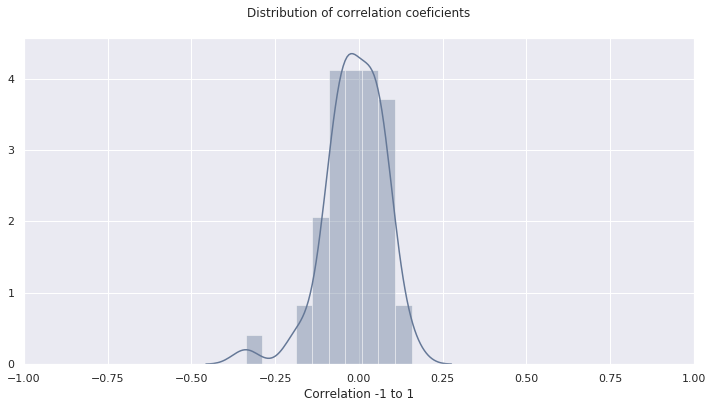

In [26]:
# Observing the distribution of correlation coeficients
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.distplot(corr_df.correlation, kde=True, bins = 10, ax=ax)
plt.xlim([-1, 1])
plt.xlabel('Correlation -1 to 1')
ax.set_title("Distribution of correlation coeficients\n");


> **Comment:** As we can see the correlation coefficients gather around 0. Meaning that most of the features don't really show a strong relation to if a student pass or not the course. But the values are not 0, which means that correlation exists even if weak, positive or negative.
We'll see this more clearly in the following chart.

### Correlation coeficient variance from 0

**Model fig 2**
* With this visualization I intend to see how strong (positively or negatively) the correlation between different features is compared to the target "passed" and represented in a horizontal line deviating from 0 (no correlation).

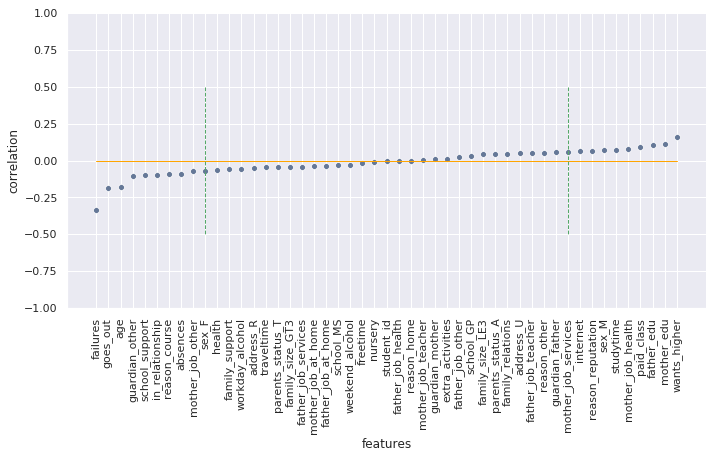

In [27]:
# An even more practical way of viewing the correlations
''' Creating an horizontal view of the correlations in relation to the middle value 0
produces a very concise view of how each feature relates to the target "passed".
This is a great help and guide to choose the features we want to explore. '''

f = len(corr_df.features) -1
sns.relplot(x='features', y='correlation', data=corr_df, aspect=20/10)

plt.ylim([-1, 1]) # Use this code to see correlations in total (-1, 1) correlation values. 
                  # This is a more realistic view of the variability of the correlation coeficients
                  # and it's relation to the extreme values of -1 and 1.

# plt.ylim([-0.2, 0.2]) # Use this code for a better apreciation of differences in correlation values.

plt.xticks(rotation=90);
plt.plot([0, f], [0, 0], linewidth=1, c='orange');
plt.plot([9, 9], [0.5, -0.5], linewidth=1, c='g', linestyle='--');
plt.plot([39, 39], [0.5, -0.5], linewidth=1, c='g', linestyle='--');

> **Comment:** The graph shows clearly that some of the features have a stronger relation to the target "passed". Some features have a positive correlation and others a negative correlation. While in the middle of the grapph, features with a 'close to zero' correlation coefficient are represented. 
* I've marked with a green line the top and bottom 10 features. I think that is a good idea to draw a line to choose with features we will continue to work with for the visualizations. This doesn't mean that we won't work or look a other features inside the green lines. In fact, I'm surprised about why some of the features of the center don't have a stronger correlation like 'freetime' or 'extra activities'. But because of the project nature an deadlines we need to choose and limit what we will look at.
* So from the graph above I'll consider some features with positive correlation, some with negative correlation, and some with neutral correlation.        
                 

#### What is/are the main feature(s) of interest in your dataset?
I'd like to assume that the main features would be those which show a positive or negative correlation to the target feature 'passed'. Because what we want to know is what affects a student result. To name a few, those could be 'failures', 'goes_out', 'age', 'guardian', 'wants_higher', 'studytime', 'paid_class' etc... But I'd like to consider as the main features the extremes that show a hight levels of correlation (positive or negative). Then I'll choose 'failures', 'goes_out', 'age', 'wants_higher', 'paid_class' and 'studytime' (ommiting 'father_edu' and 'mother_edu' just to get it down to 6 features).

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
The above 6 features should give me a lot of information, but there are other aspects that can provide insights about how a learning environment works. Thus I'd like to look at other features as well even if they maybe do not qualify looking at the correlation coefficients. I'll limit those features to three: 'parents_status', 'family_relations' and 'traveltime'.

---

### **The next question:** 
For a school today is very important to identify which circumstances affect a student's result, both if these circumstances are affecting the students performance positively or negatively. The graphs above are proof about why identifying this circumstances is so difficult (not very strong correlations), making also difficult to allocate resources. We can observe that things like a student's number of failures seem to affect negatively the students result but there is not strong evidence knowing that a strong negative correlation coefficient should be close to -1 and for this feature correlation coefficient is "only" -0.3377. Can we get a closer look at this?
    
    To find out more I'll now create a logistic regression model using the StatsModels library and we'll use it to look at significance coefficients (or p-values) 

## Exploration with Statsmodels <a id='stats'></a>

In [28]:
# Model using three of the top and bottom correlation coeficients
# At this point experimentation is possible combining different numbers and combinations of features
student_data_model['intercept'] = 1

log_model = sm.Logit(student_data_model['passed'], 
                     student_data_model[['intercept', 'failures', 'goes_out', 'age', 'wants_higher', 
                                         'paid_class', 'studytime' ]])


results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.560537
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                  395
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            6
Date:                Thu, 17 Jan 2019   Pseudo R-squ.:                  0.1152
Time:                        13:51:43   Log-Likelihood:                -221.41
converged:                       True   LL-Null:                       -250.25
                                        LLR p-value:                 1.331e-10
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        4.1935      1.770      2.369      0.018       0.724       7.663
failures        -0.8522      0.179     -4.761      0.000      -1.203      -0.501
goes_out        -0.3059      0.107     -2.868      0.004      -0.515      -0.097
age             -0.1670      0.096     -1.736      0.082      -0.356       0.021
wants_higher     0.5409      0.571      0.948      0.343      -0.577       1.659
paid_class       0.1396      0.241      0.580      0.562      -0.332       0.611
studytime        0.0076      0.145      0.053      0.958      -0.277       0.292
================================================================================
"""

> **Comment:** The coefficients resulting from the model are pointing at the same direction as in the correlation dataframe. A first look at some p-values shows that we could be certain that the previously mentioned "failures" feature is of extreme significance for a student result. These coefficients are not calculated in the same way as the correlations and that they are also dependent on how many and which features we input in the model.
Now, to get a realistic result from the modeling we should try different combinations of features and tune the model as much as we can. But because this is not the main goal of this project we'll assume, for now, that looking at the p-values, the coefficients and the previously calculated correlations we have an idea of the structure of the dataset, the importance of the features and that is for now enough information to start looking at some graphs.

## Univariate Exploration <a id='uni'></a>

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables

> The following plots are chosen based om my previous data wrangling and observations, what also gave me a sense and feel for what I want to look at. I'd like to start looking at categorical variables related to the general student results and some social aspects.

> **Note:** For the exact numbers check the "Some quick statistics on the dataset" section above on this notebook.

**Fig 1. Distribution af ages**


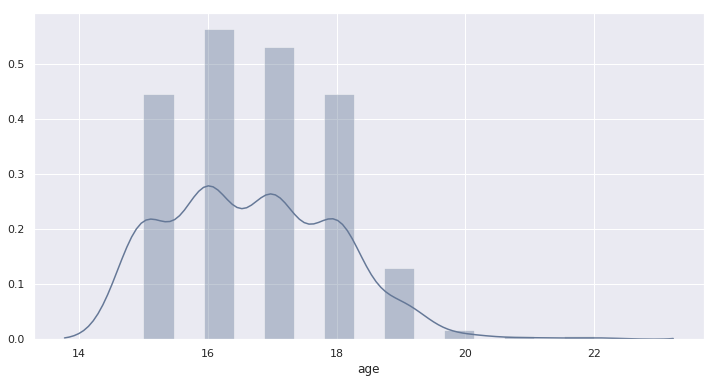

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.distplot(student_data["age"], kde=True, bins = 15, ax=ax);

> **Commentary on Fig 1.** We can observe that the majority of the students are between 15 and 18 years of age. With a very few passing 20 years of age.

**Fig 2. Students by gender**


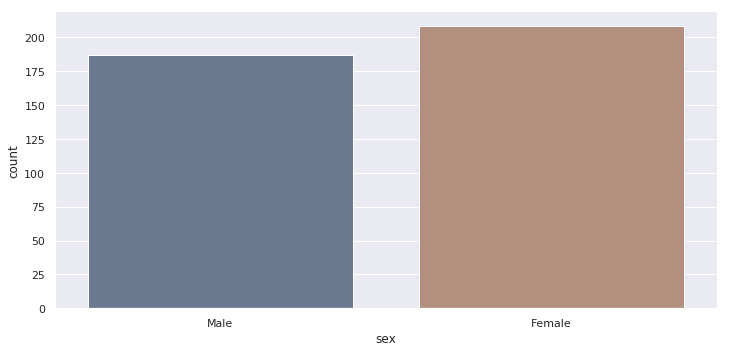

In [30]:
g = sns.catplot(x='sex', data=student_data, kind='count', aspect=20/10);
g.set_xticklabels(['Male', 'Female']);

> **Commentary on Fig 2.** There are more females in the school but the the gender distribution is very close to 50/50 


**Fig 3. Students who passed**


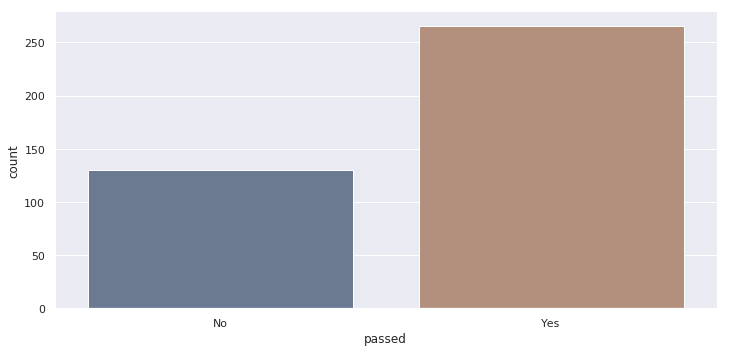

In [31]:
g = sns.catplot(x='passed', data=student_data, kind='count', aspect=20/10);
g.set_xticklabels(['No', 'Yes']);

> **Commentary on Fig 3.** The amount of students who pass the finals is more than double than those who doesn't.


**Fig 4. Guardian categories**

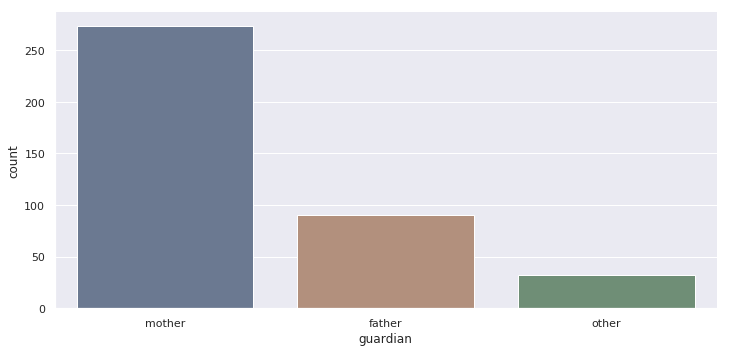

In [32]:
sns.catplot(x='guardian', data=student_data, kind='count', aspect=20/10);

> **Commentary on Fig 4.** Most of the students have their mother as guardian.


**Fig 5. Parent Status**

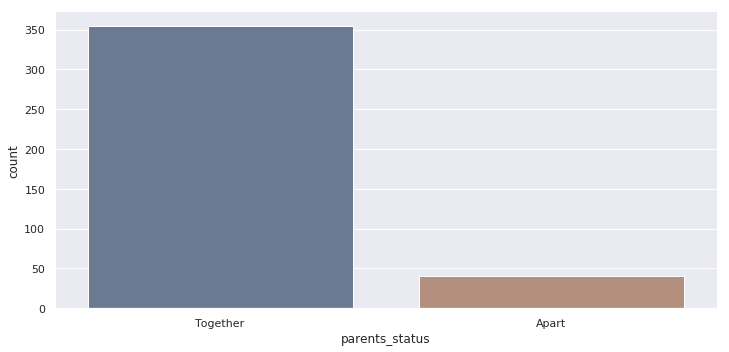

In [33]:
g = sns.catplot(x='parents_status', data=student_data, kind='count', aspect=20/10);
g.set_xticklabels(['Together', 'Apart']);

> **Commentary on Fig 5.** The majority of the parents live together.


**Fig 6. Family Relations**

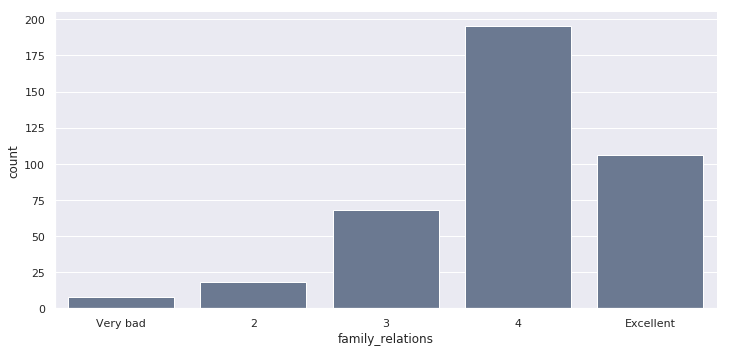

In [34]:
g = sns.catplot(x='family_relations', data=student_data, kind='count', aspect=20/10, color = base_color)

g.set_xticklabels(['Very bad','2', '3', '4', 'Excellent']);

> **Commentary on Fig 6.** Most of the students have families where relations are very good or excellent.


**Fig 7. Traveltime**

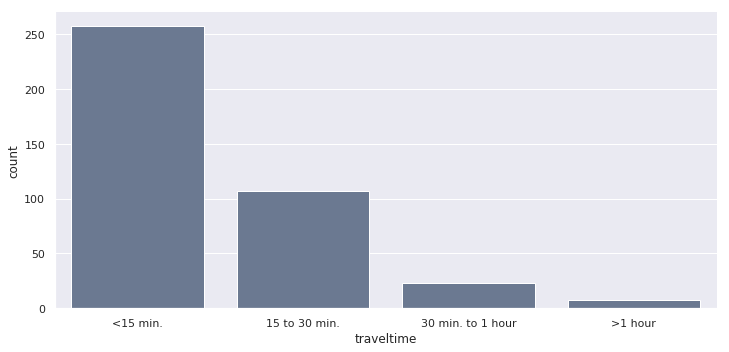

In [35]:
g = sns.catplot(x='traveltime', data=student_data, kind='count', aspect=20/10, color = base_color)
g.set_xticklabels(['<15 min.', '15 to 30 min.', '30 min. to 1 hour', '>1 hour']);

> **Commentary on Fig 7.** Most of the students live very close to the school

**Fig 8. Studytime**

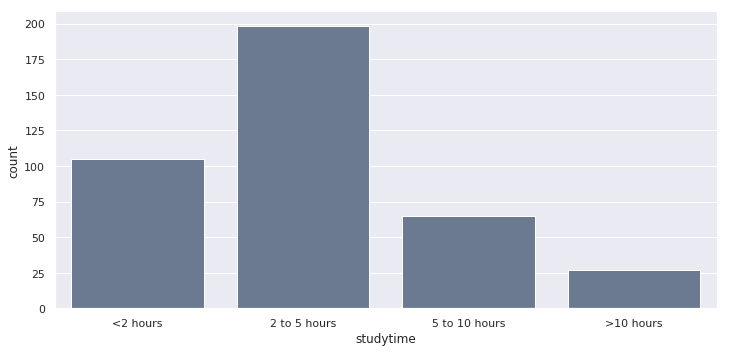

In [36]:
g = sns.catplot(x='studytime', data=student_data, kind='count', aspect=20/10, color = base_color)
g.set_xticklabels(['<2 hours', '2 to 5 hours', '5 to 10 hours', '>10 hours']);

> **Commentary on Fig 8.** In this graph we can observe that most of the students study between less than 2 hours and 5 hours a week, which means one hour of study a day at most (assuming they only study on weekdays).

**Fig 9. Going out with friends**

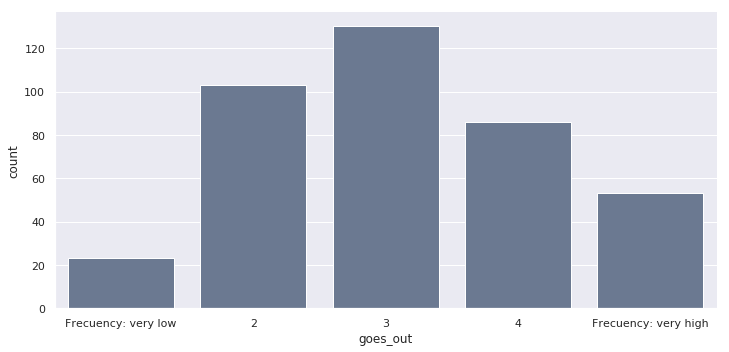

In [37]:
g = sns.catplot(x='goes_out', data=student_data, kind='count', aspect=20/10, color = base_color)
g.set_xticklabels(['Frecuency: very low', '2', '3', '4', 'Frecuency: very high']);

> **Commentary on Fig 9.** The distribution looks very "normal", with a lower amount of students going out a lot or not so much.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Looking at the graphs above I'd like to believe that conditions or school environment look very normal. Distribution of genders is equal, most of the students pass the course even if 2/3 is in my opinion a low rate. Most families live close to the school and have in general good relationships. The students study and socialize.

> Some unusual points would be the ages above 18. These points show like outliers but they are not. They are students that needed to "repeat" academic years.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data used is very clean and didn't need any adjustments for the observations I wanted.
> One thing that catches my attentions is that the mother is often registered as the guardian even if it's common for the parents to leave together. This social aspect cannot easily be discussed as we don't know the origin of the data. I'll assume it's from an American school but I have no proof of it. 

---

## Bivariate Exploration <a id='bi'></a>

**Fig 10.** In the correlation graphs we looked at before we could see that the amount of failures a student has accumulated affects negatively on the results. Can we see that graphically?

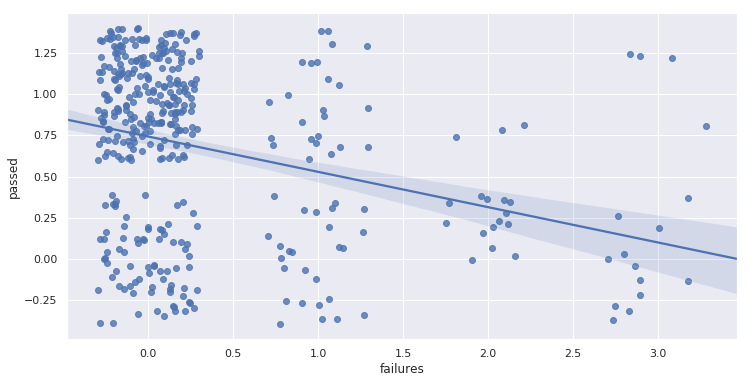

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
sns.regplot(x="failures", y="passed", data=student_data, ax=ax, x_jitter=0.3, y_jitter=0.4);


> **Commentary on Fig 10.** We can clearly see that as the amount of failures accumulated increases the options to pass the course closes to 0, meaning that the options to pass the course decreases. The steepness of the regression line also shows that this correlation is important.

**Fig 11.** Is there any relationship between the distance the students have to the school and the amount of time they study?

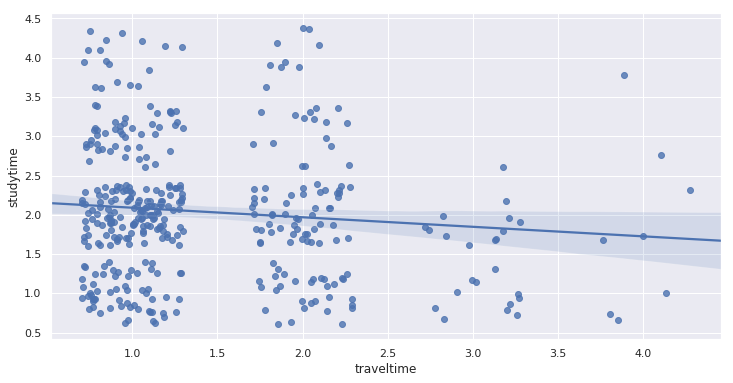

In [89]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g=sns.regplot(x="traveltime", y="studytime", data=student_data, ax=ax, x_jitter=0.3, y_jitter=0.4);

> **Commentary on Fig 11.** Not a deciding factor maybe, but as the 'traveltime' increases, the 'studytime' decreases.

**Fig 11a**

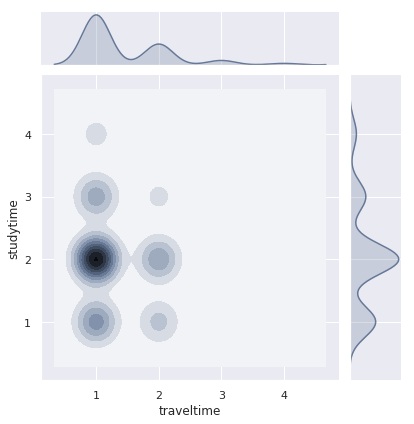

In [40]:
# An alternative view of the previous comparison
sns.jointplot(x="traveltime", y="studytime", data=student_data, kind="kde");


**Fig 12.** How does 'age' affect the student's result?

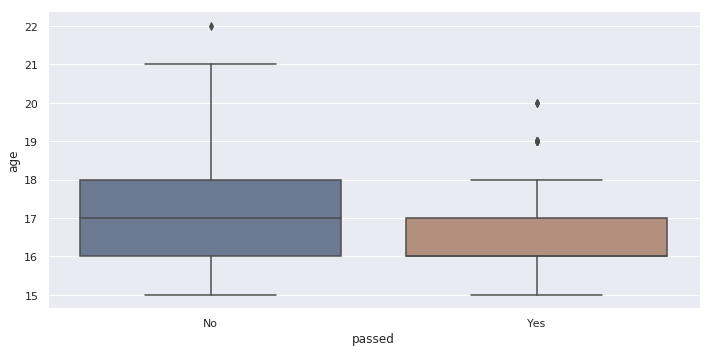

In [41]:
g = sns.catplot(x='passed', y='age', data=student_data, kind='box', aspect=20/10);
g.set_xticklabels(['No', 'Yes']);

> **Commentary on Fig 12.** The graph shows that there are more older students in the group that doesn't pass. So 'age' is also a feature that affect the student result. 

> Options to pass decrease as they grow older. We can see this clearly in the following plot:

**Fig 12a**

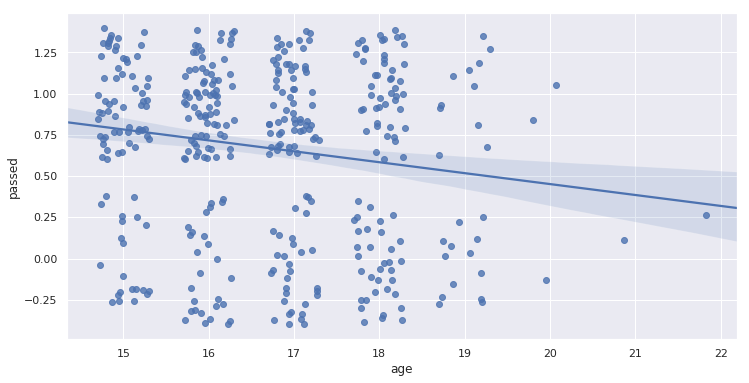

In [88]:
# An alternative view of the previous comparison
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g=sns.regplot(x="age", y="passed", data=student_data, ax=ax, x_jitter=0.3, y_jitter=0.4);

**Fig 13.** How does the fact of going out with friends affect the student's result?

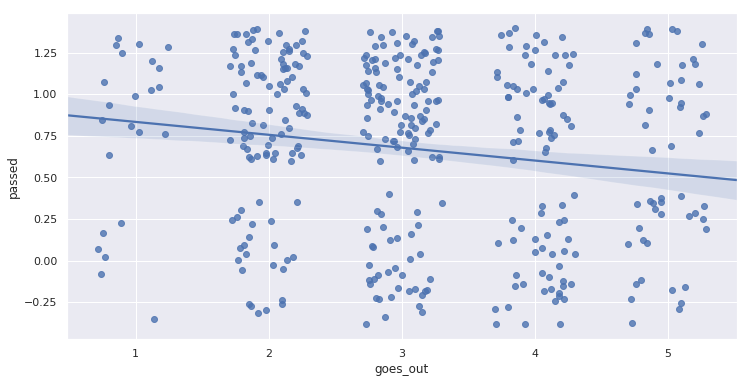

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g=sns.regplot(x="goes_out", y="passed", data=student_data, ax=ax, x_jitter=0.3, y_jitter=0.4);

> **Commentary on Fig 13.** The graph shows that the more often the students go out the less their options to pass.

We've seen that there is a relation between both the age and how much a student goes out and their school results. So we go to the next question:

**Fig 14.** Is there any correlation between how much they go out and their age?

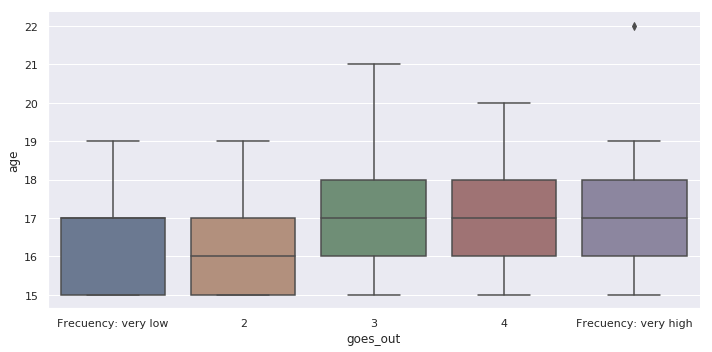

In [44]:
g = sns.catplot(x='goes_out', y='age', data=student_data, kind='box', aspect=20/10);
g.set_xticklabels(['Frecuency: very low', '2', '3', '4', 'Frecuency: very high']);

> **Commentary on Fig 14.** The graph shows that the younger students tend to go out less than the older ones. We can also observe some older students (looks like outliers) that go out frequently.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The visualizations above confirm what we could preview in the model. Looking at some features that affects student results negatively we cans see that there is a relation between the variables observed. Age and how much a student goes out for example. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, the negative correlation 'traveltime' and 'studytime'. It is interesting to see that the 'traveltime' can make a student study less, even if it's maybe not a very strong correlation. At the same time we know from the correlation graph that 'studytime' is an important factor in a student final results. See graph below:

**Fig 15.** Does studytime affects results?

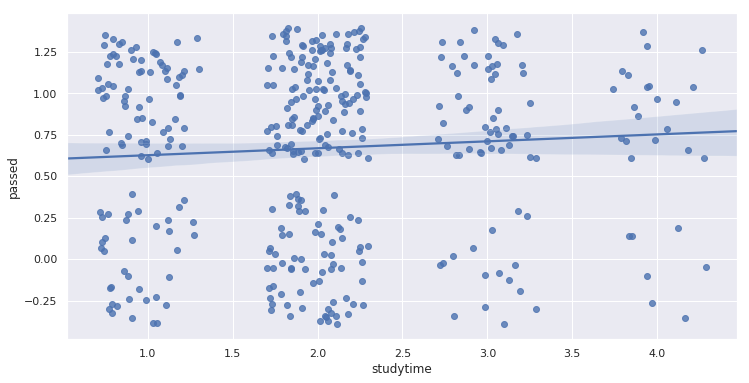

In [91]:
# Visualisation of the above statement
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g=sns.regplot(x="studytime", y="passed", data=student_data, ax=ax, x_jitter=0.3, y_jitter=0.4);

---

## Multivariate Exploration <a id='mu'></a>

**Fig 16.** In the next graph I'll try to visualise another feature, all students absences, colored by gender and sized by age

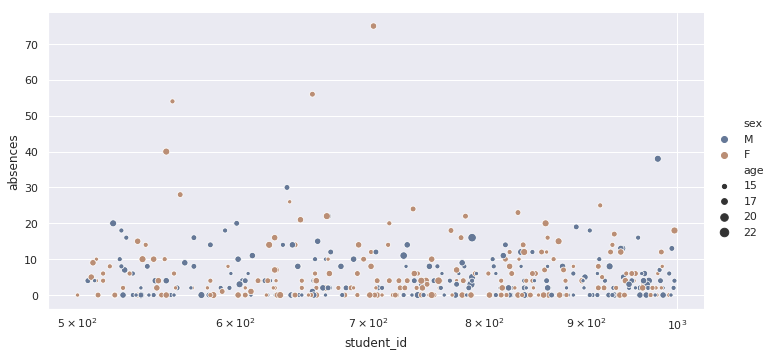

In [46]:
g = sns.relplot(x='student_id', y='absences', data=student_data, hue="sex", size="age",
           aspect=2/1);
g.set(xscale = 'log') # Helps to clean up the bottom part of the graph


> **Commentary on Fig 16.** For this visualisation I tested different plot sizes in my intent to produce a clear view of the data points. I'll try to better this plot if I have enought time.

> What we can observe is that the older students are easily indentified by the points size. As well as some females with a lot of absences identified by the color. But in general I cannot really see a pattern very clearly. Maybe more absence in older male students...

**Fig 16b.** Student absences separated by gender and colored by result.

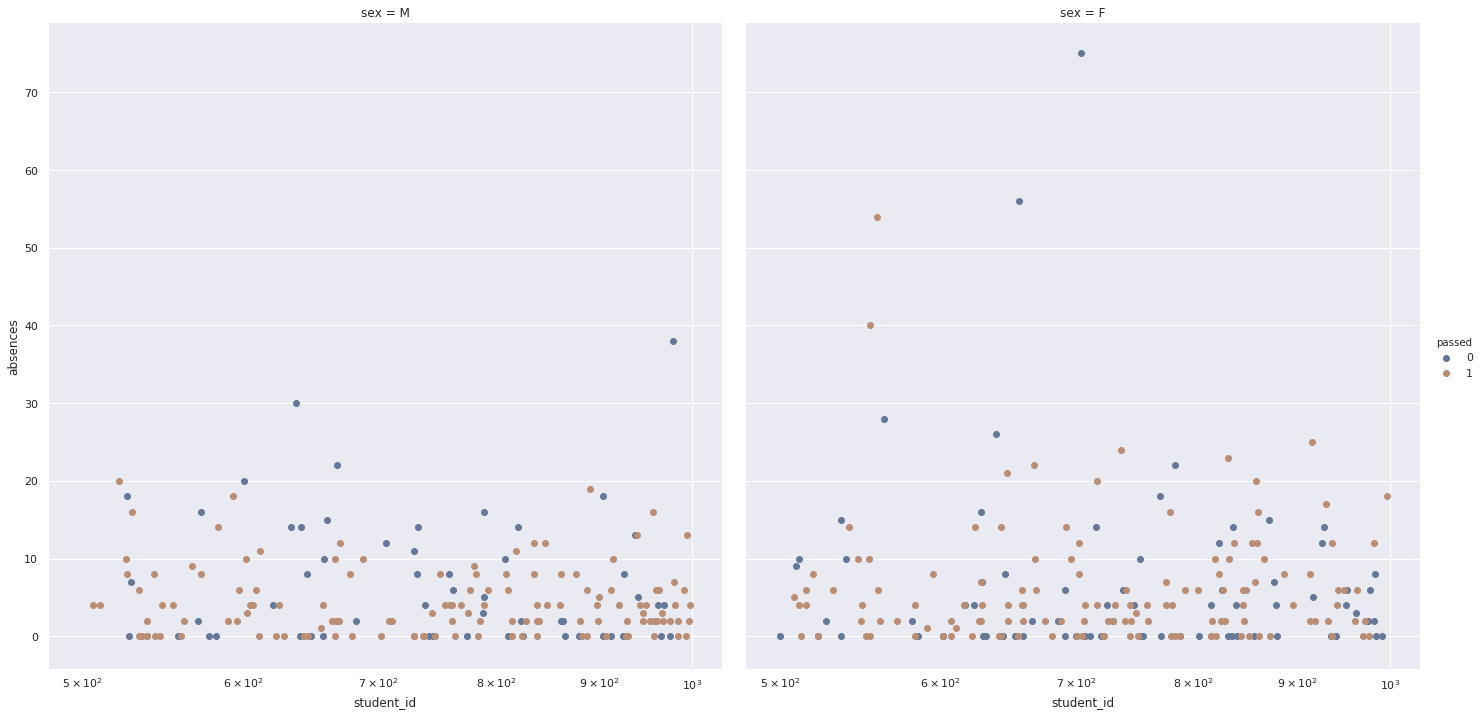

In [47]:
g = sns.FacetGrid(student_data, col="sex", hue="passed", height=10)
g.map(plt.scatter, "student_id", "absences")
g.set(xscale = 'log') # Helps to clean up the bottom part of the graph
g.add_legend();

> **Commentary on Fig 16a.** The graph confirms that some females have a high amount of absences. At the same time we can observe that both groups have an similarly distributed shape in their 'absence' characteristics.

> **An interesting observation** here is that the Male group seems to gather more blue points as the number of absences increases. This confirms the previopus correlation observations where a higher number of absences decreases the options of passing the course.

**In this last section** I'd like to explore the relationship between failures, absences, gender and age.

**Fig 17.** Age and absences related to gender

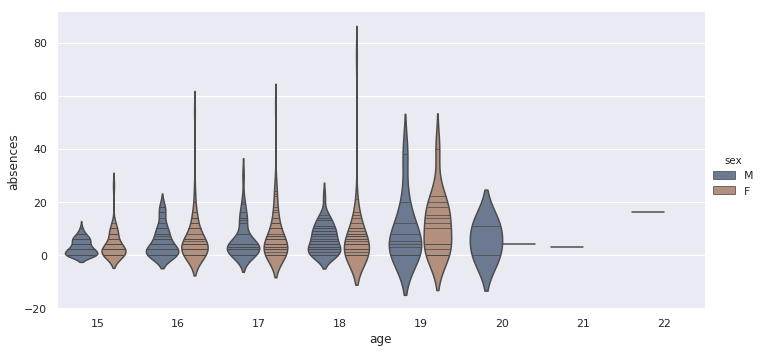

In [48]:
sns.catplot(x='age', y='absences', data=student_data, kind='violin', hue='sex', split=False, inner="stick",
           aspect=20/10);

**Fig 17b.** A better view using box plots

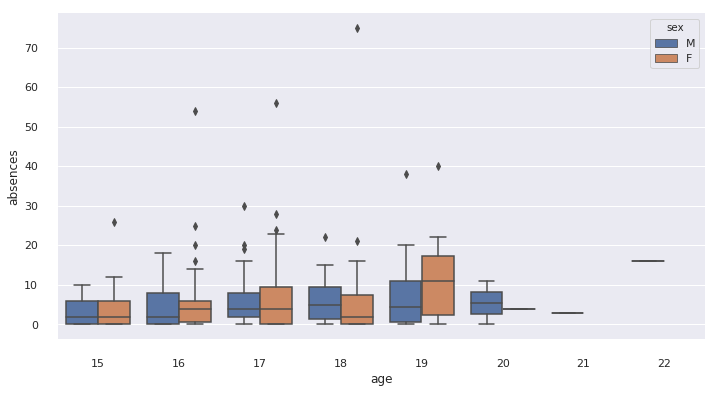

In [49]:
sns.set(rc={'figure.figsize':(11.6,6)})
sns.boxplot(x="age", y="absences",
            hue="sex",
            data=student_data)

sns.despine(offset=10, trim=True)

> **Commentary on Figs 17 and 17b.** My observation here is that the number of absences increases with the age. And that females have in general a higher number of absences that males.

**Fig 18.** Age and Failures related to gender

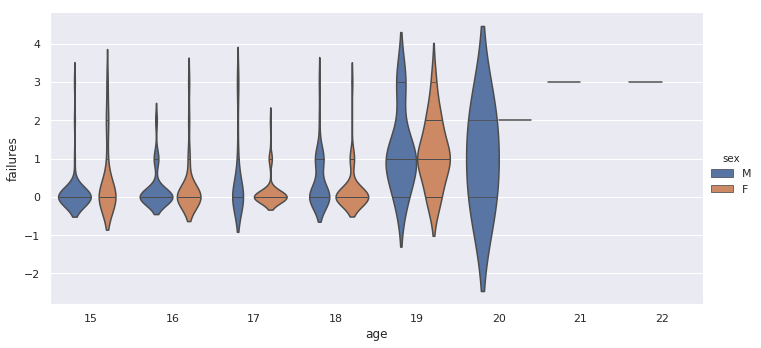

In [50]:
sns.catplot(x='age', y='failures', data=student_data, kind='violin',hue='sex', split=False, inner="stick",
           aspect=20/10);

> **Commentary on Fig 18.** The mount of failures seem to increase at the age of 19. But there is not a very significant difference between males and females.

**Fig 19.** Failures and absences related to gender

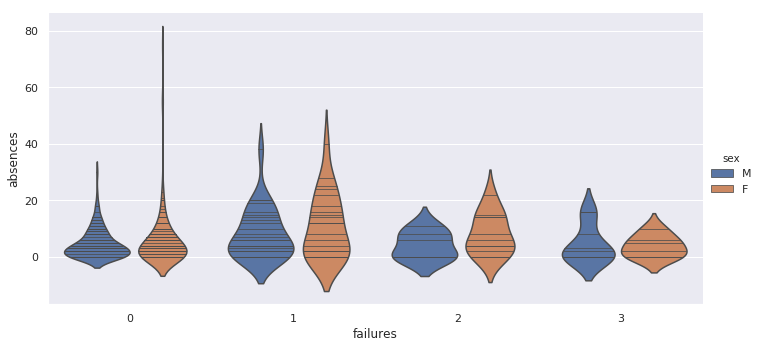

In [51]:
sns.catplot(x='failures', y='absences', data=student_data, kind='violin',hue='sex', split=False, inner="stick",
           aspect=20/10);

> **Commentary on Fig 19.** I think it's interesting, if surprising to observe that the amount of absences seems to decrease as the number of failures increases. How can this be possible? We have already observed that both 'failures' and 'absences' have a negative correlation to if a student passes. 
> I have at this point gone back to the correlation matrix to confirm this observation: 

In [52]:
# Correlation Absences-Failures
corr_df_master.loc['absences':'failures','absences':'failures']

,absences,failures
absences,1.000000,0.063726
failures,0.063726,1.000000


The code confirms that, in this case, maybe this visualization type 'fools' the observer. The correlation between the features, if very weak, is positive. Meaning that they increase (or decrease) together.

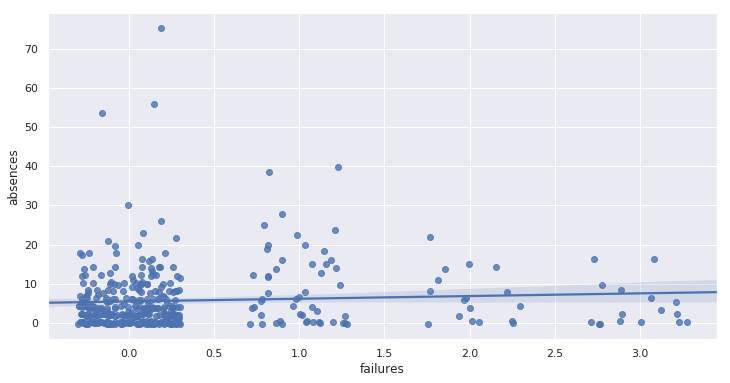

In [102]:
# Visualisation of the above statement
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
g=sns.regplot(x="failures", y="absences", data=student_data, ax=ax, x_jitter=0.3, y_jitter=0.4)


**Fig 20.** Finally I'd like to explore 'studytime' and 'absences' related to if they pass the course

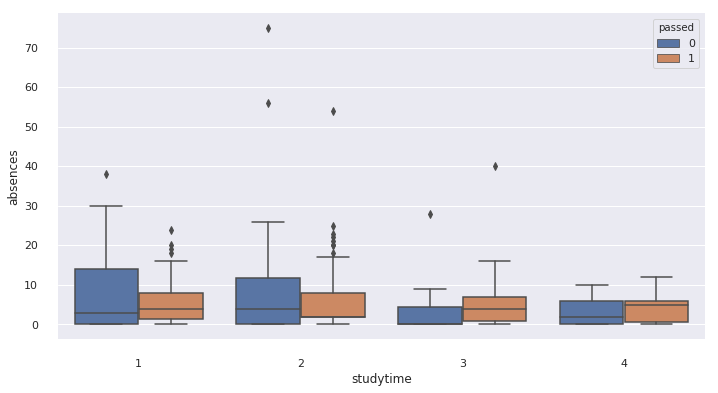

In [54]:
sns.set(rc={'figure.figsize':(11.6,6)})
sns.boxplot(x="studytime", y="absences",
            hue="passed",
            data=student_data)
sns.despine(offset=10, trim=True)

> **Commentary on Fig 19.** As we can see the amount of astudents tha don't pass (blue) decreases as the study time increases. The number of absences deacreases as well.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I think that the visualizations confirm that in general, absences increase with age. Also, females have a higher number of absences.
### Were there any interesting or surprising interactions between features?

> The last graph (fig 20) is a very interesting resumé of education in general. "If you go to school and study, you'll pass". Nothing new here maybe but a very concise way to observe this fact.

### Conclusions <a id='conclusions'></a>
> The number of observations and visualizations is limited in this project. The number of features and correlation could be extended and studied much moire in detail. But I think we get some interesting points and general ideas of how this school works both socially and academically.
> The type of visualizations is also a bit limited looking at the type of features. We have a lot of categorical values and very little continuous numerical features. We don't have time frames or region frames either. But I think the the data provides a lot of interesting insights in this field. Visuals don't ned to be very complicated to show concise points. 

> We've also seen the the school's social aspects seem to be 'normal': students that study regularly, and generally functional families who live close to the school.

> Through the lines of code and the visuslizations we've been able to observe how different factors affect the student's final result. Some factors have a positive affect, like if the student have intetion to continue studing after the end of the course or the amount of time they study. Other factors have a negative effect, like how much they go out or the amount of previous failures.

> We've observed very strong correlations like the age or previous failures related to the final result. And very weak correlations like the one between the amount of absences and previous failures. But there is not a single deciding factor. The result is a combination of ircumstances that could be explored in much more detail

### The unanswered question <a id='question'></a>
> So how is it possible, based on the observations, that only 2/3 of the students pass? What we know from the last graph is that showing up and studying will help for sure, but it's not enough. To answer this question a much deeper analysis is needed. A very exciting question to answer but which for now need to remain a 'mystery'. Let's say "to be continued..."

> To give some light I'd like to conclude saying that this unanswered question is one of the reasons why education is so exciting and so difficult: all the factors point to one direction (like these student's generally favorable conditions for learning) but the result in unexpected (like the fact that only 2/3 of the students passed the course).

> Samuel E. Jiménez Sanabria
